# DFA Learning Demo: Divisible-by-3 Automaton

This notebook demonstrates how an assembly calculus network learns to implement a finite state machine (FSM) that recognizes binary strings divisible by 3.

In [1]:
from pyac.tasks.automata.dfa import make_div3_dfa
from pyac.tasks.automata.metrics import accuracy_vs_presentations
from pyac.core.rng import make_rng
import matplotlib.pyplot as plt

In [2]:
dfa = make_div3_dfa()
print(f"DFA States: {dfa.states}")
print(f"Alphabet: {dfa.alphabet}")
print(f"Initial State: {dfa.initial_state}")
print(f"Accept States: {dfa.accept_states}")

DFA States: ('q0', 'q1', 'q2')
Alphabet: ('0', '1')
Initial State: q0
Accept States: frozenset({'q0'})


In [3]:
n_pres_list = [1, 5, 10, 20, 50]
test_strings = ['0', '1', '10', '11', '100', '110', '111', '1001']

results = accuracy_vs_presentations(
    dfa=dfa,
    n_neurons=150,
    k=10,
    density=0.2,
    plasticity=0.7,
    n_presentations_list=n_pres_list,
    test_strings=test_strings,
    rng=make_rng(42)
)

print("\nAccuracy vs Training Presentations:")
for n_pres, acc in sorted(results.items()):
    print(f"  {n_pres:3d} presentations -> {acc:.2%} accuracy")


Accuracy vs Training Presentations:
    1 presentations -> 100.00% accuracy
    5 presentations -> 100.00% accuracy
   10 presentations -> 100.00% accuracy
   20 presentations -> 100.00% accuracy
   50 presentations -> 100.00% accuracy


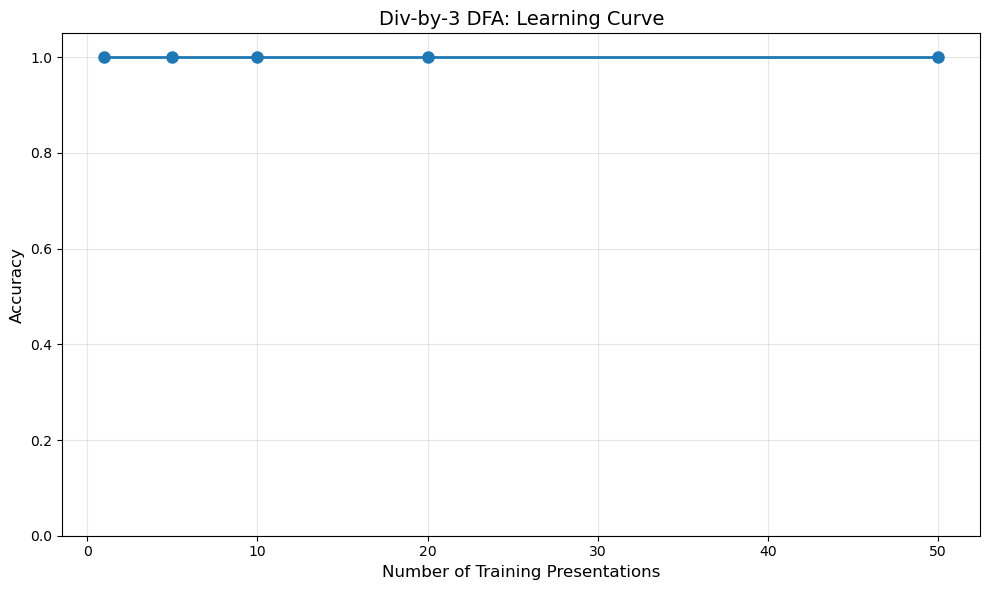

In [4]:
plt.figure(figsize=(10, 6))
presentations = sorted(results.keys())
accuracies = [results[n] for n in presentations]

plt.plot(presentations, accuracies, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of Training Presentations', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Div-by-3 DFA: Learning Curve', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()